# Inferential Statistics

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

## Uniform Distribution

In [3]:
from scipy.stats import uniform

uniform

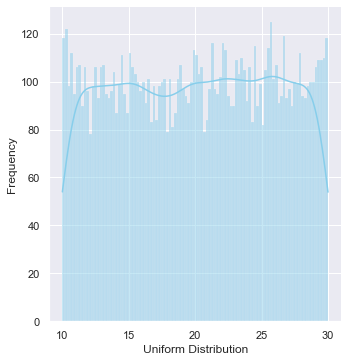

In [18]:
# buat random numbers yang membentuk uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

ax = sns.displot(data_uniform,
                  bins=100,
                  kde=True, 
                  color='skyblue',
                  alpha=0.5,
                  linewidth=0.1)
ax.set(xlabel='Uniform Distribution', ylabel='Frequency')

## Normal Distribution

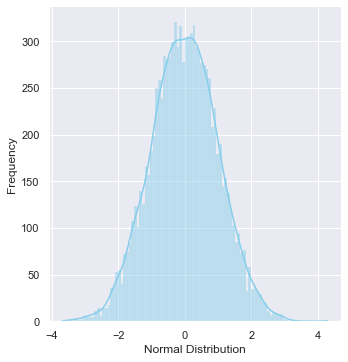

In [21]:
from scipy.stats import norm
data_normal = norm.rvs(size=10000, loc=0, scale=1)

ax = sns.displot(data_normal,
                  bins=100,
                  kde=True, 
                  color='skyblue',
                  alpha=0.5,
                  linewidth=0.1)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

## Gamma Distribution

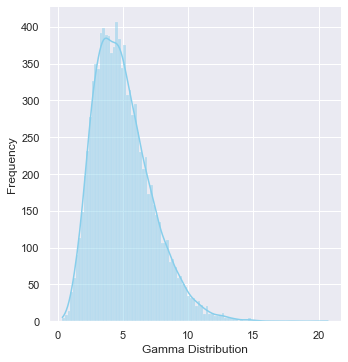

In [29]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)

ax = sns.displot(data_gamma,
                  bins=100,
                  kde=True, 
                  color='skyblue',
                  alpha=0.5,
                  linewidth=0.1)
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

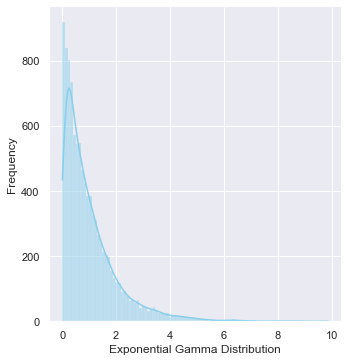

In [24]:
data_gamma = gamma.rvs(a=1, size=10000)

ax = sns.displot(data_gamma,
                  bins=100,
                  kde=True, 
                  color='skyblue',
                  alpha=0.5,
                  linewidth=0.1)
ax.set(xlabel='Exponential Gamma Distribution', ylabel='Frequency')

## Exponential Distribution

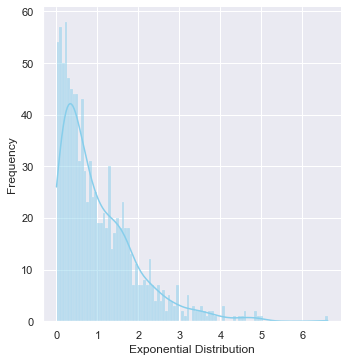

In [32]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1, loc=0, size=1000)

ax = sns.displot(data_expon,
                  bins=100,
                  kde=True, 
                  color='skyblue',
                  alpha=0.5,
                  linewidth=0.1)
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

## Poisson Distribution

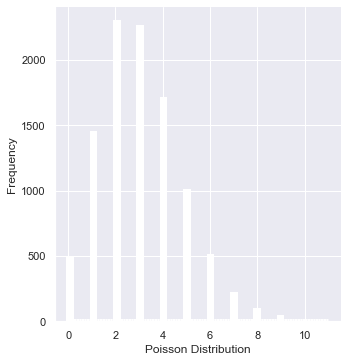

In [38]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

ax = sns.displot(data_poisson,
                  bins=100,
                  kde=False, 
                  color='skyblue',
                  alpha=1,
                  linewidth=5)
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## Binomial Distribution
- saat hanya ada dua pilihan

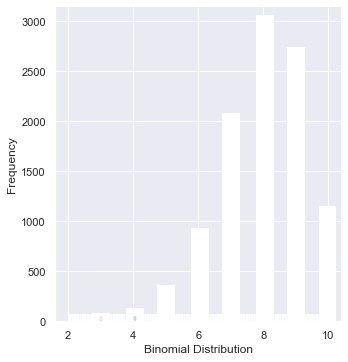

In [44]:
from scipy.stats import binom
data_binom = binom.rvs(n=10, p=0.8, size=10000)

ax = sns.displot(data_binom,
                  bins=100,
                  kde=False, 
                  color='skyblue',
                  alpha=0.5,
                  linewidth=15)
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

## Bernoulli Distribution

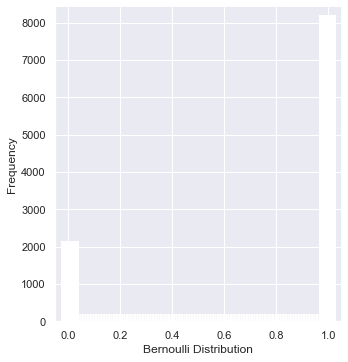

In [48]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000, p=0.8)

ax = sns.displot(data_bern,
                  bins=100,
                  kde=False, 
                  color='skyblue',
                  alpha=0.5,
                  linewidth=15)
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

## Confidence Interval

cara hitung CI adalah dengan:
1. Best Estimate += Margin of Error
2. Margin of Error = z * SE (Standar Error )
3. z didapat dari % keyakinan (% confidence)
    - 75% yakin, z = 1.15
    - 90% yakin, z = 1.64
    - 95% yakin, z = 1.96
    - 97% yakin, z = 2.17
    - 99% yakin, z = 2.57
    - 99.90% yakin, z = 3.29

### menghitung CI dengan mean
4. SE = std / sqrt(n)
5. Best Estimate = mean

### menghitung CI dengan population proportion
4. SE = sqrt(pop_prop * (1-pop_prop) / n)
5. Best Estimate = population proportion 

In [50]:
# Hitung CI dari dataset Heart Disease
import numpy as np
import pandas as pd
df = pd.read_csv('data/Heart.csv')
print(df.shape)
df.head()

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [51]:
df['Sex1'] = df['sex'].replace({1:'Male', 0:'Female'})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female


In [53]:
dx = df[["target", "Sex1"]].dropna()
print(dx.shape)
dx.head()

(1025, 2)


,target,Sex1
0,0,Male
1,0,Male
2,0,Male
3,0,Male
4,0,Female


In [54]:
pd.crosstab(dx['target'], dx['Sex1'])

Sex1,Female,Male
target,,
0,86,413
1,226,300


In [55]:
# berapa banyak persentase female yang punya sakit jantung?

p_fm = 226 / (86+226)
print(p_fm)

0.7243589743589743


In [56]:
n = 86+226
n

312

In [57]:
# cari SE nya
se_fm = np.sqrt(p_fm * (1-p_fm) / n)
se_fm

0.02529714756803247

In [59]:
# kita mau 95% yakin, jadi z adalah 1.96
z_score = 1.96
moe_fm = z_score * se_fm
print(moe_fm)

0.049582409233343644


In [61]:
(p_fm - moe_fm, p_fm + moe_fm)

(0.6747765651256307, 0.773941383592318)

kita yakin 95% kalau jumlah wanita yang sakit jantung ada diantara 67-77% dari semua wanita

In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female


In [66]:
# berapa rata-rata tingkat cholesterol female?
# df.groupby('Sex1')['chol'].mean()

df.groupby('Sex1')['chol'].agg(["mean", "std", "count"])

,mean,std,count
Sex1,,,
Female,261.455128,64.466781,312
Male,239.237027,43.155535,713


In [67]:
mean_fe = 261.45
sd_fe = 64.4
n = 312
# mau 95% yakin jadi z-score = 1.96
z_score = 1.96

In [68]:
se = sd_fe / np.sqrt(n)
# 5. Best Estimate = mean

In [69]:
(mean_fe - z_score*se, mean_fe + z_score*se)

(254.3039731821066, 268.59602681789335)

kita 95% yakin kalau tingkat kolesterol wanita ada di antara 254.303 dan 268.596

# Contoh lain - Confidence Interval

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize': (13,7.5)})
sns.set_context('talk')

In [72]:
np.random.seed(42)
normal_us_male_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_us_female_pounds = np.random.normal(loc=132, scale=22, size=6500)
all_mass = np.concatenate((normal_us_male_pounds, normal_us_female_pounds), axis=0)

df_mass = pd.DataFrame(data={'us_people_pounds': all_mass})

df_mass.head()

,us_people_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


Text(0.5, 1.015, 'Distribution of Mass of US people')

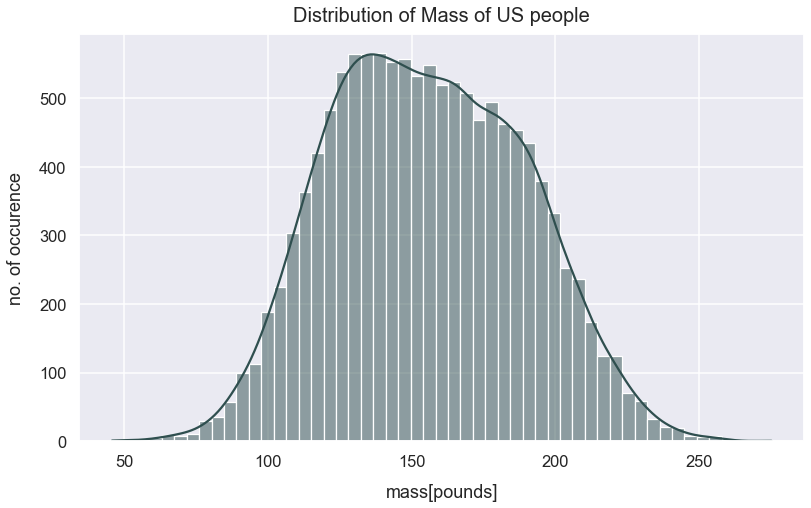

In [84]:
sns.histplot(df_mass['us_people_pounds'], kde=True, color="darkslategrey")

plt.xlabel("mass[pounds]", labelpad=14)
plt.ylabel("no. of occurence", labelpad=14)
plt.title("Distribution of Mass of US people", y=1.015, fontsize=20)

bentuk distribusi nya kurang normal, jadi kita akan tunjukkan satu teknik untuk membuat distribusi normal dari data seperti ini

In [86]:
# 1. Cari Mean
pop_mean = df_mass["us_people_pounds"].mean()
print("mean:", pop_mean)

mean: 155.4232805942338


In [88]:
# 2. Cari std
pop_sd = df_mass["us_people_pounds"].std()
print("std:", pop_sd)

std: 33.585190883958624


In [93]:
# ambil 300 sampel dari 25 random variable
sample_means = []
n = 25
for sample in range (0,300):
    sample_values = np.random.choice(a=df_mass['us_people_pounds'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)
    
print(len(sample_means))
# sample_means

300


In [90]:
df_mass['us_people_pounds']

0        192.921140
1        177.681657
2        196.544525
3        217.552717
4        175.380319
            ...    
12495    120.060669
12496    152.223744
12497    148.408843
12498    127.938558
12499    106.530316
Name: us_people_pounds, Length: 12500, dtype: float64

Text(0, 0.5, 'freq. of occurence')

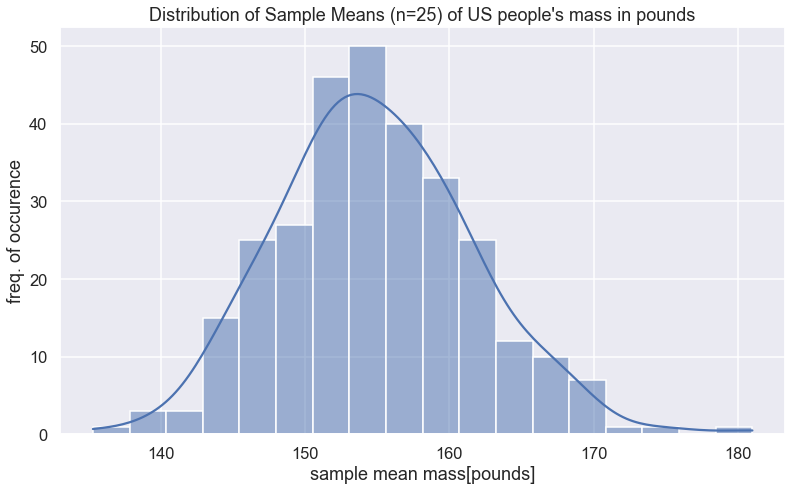

In [98]:
sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means (n=25) of US people's mass in pounds")
plt.xlabel("sample mean mass[pounds]")
plt.ylabel("freq. of occurence")

In [100]:
# sekarang kita hitung median, mean, std data di atas
s_median = np.median(sample_means)
s_mean = np.mean(sample_means)
s_std = np.std(sample_means)

(s_median, s_mean, s_std)

(154.41872045891483, 154.88640808559393, 6.793697005153691)

In [111]:
# SE = std / sqrt(n)
# std diambil dari population
s_se = df_mass['us_people_pounds'].std() / np.sqrt(n)

# z_score adalah 1.96 untuk 95% yakin
z_score = 1.96

# margin of error adalah SE * z_score
s_moe = s_se * z_score

# best estimate adalah mean
(s_mean - s_moe, s_mean + s_moe)

(141.72101325908216, 168.0518029121057)

Kita 95% yakin, kalau berat badan orang di US ada di antara 141.72 - 168.05 pounds

In [102]:
# untuk gambar graph normal distribution, dengan 95% probability di shade
# area di bawah buntut kiri dan kanan masing2 adalah 2.5% kemungkinan
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [103]:
1 - (tail * 2)

0.950004209703559

Text(154, 0.01, '95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean')

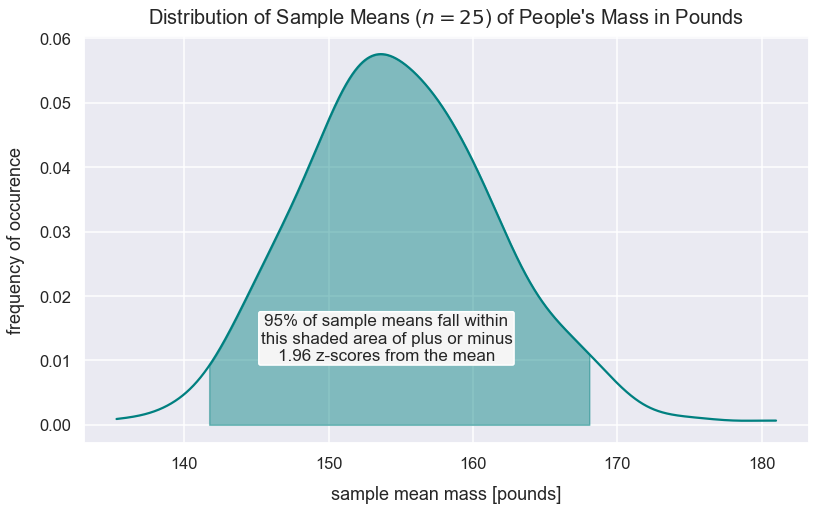

In [113]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)

plt.plot(pos, kde(pos), color='teal')

shade = np.linspace(s_mean - s_moe, s_mean + s_moe, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color="teal")

plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

plt.text(x=154, y=.01, horizontalalignment='center', fontsize=17, 
         s="95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1"))

# Hypothesis Testing

- bikin null hypothesis
- tulis null hypothesis 

contoh terapi datang 3x seminggu pulih dalam 8.2 minggu

jika datang 2x seminggu, pulih lebih lama?? <-- mau kita cek

u > 8.2

null hypotesis adalah jika datang 2x seminggu, u <= 8.2

- tes (dapat p-value)
- reject atau FAIL reject null hypothesis

### Pilih significance level

misal 5% kemungkinan salah, maka significane level 5%, atau 0.05 (umum)

misal 1% kemungkinan salah, maka significane level 1%, atau 0.01

### p-value vs alpha
- p-value < alpha => reject null hypothesis
- p-value >= alpha => FAIL reject null hypothesis

## Case Study - one population proportion

- 52% ortu percaya x 
- apakah saat ini makin banyak yang percaya x ?

x = remaja kurang tidur karena elektronik & media sosial

Population: ortu dengan remaja (usia 13-18)
p = 0.52

h1
p > 0.52 (semakin banyak ortu yang percaya x)

h0
p <= 0.52 (sama aja/ semakin dikit ortu yang percaya x)

Data: 1018 orang, 56% percaya x

In [114]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n = 1018
pnull = 0.52
phat = 0.56

print(("zstat", "p-value"))
sm.stats.proportions_ztest(phat * n, n, pnull, alternative="larger")

('zstat', 'p-value')


(2.571067795759113, 0.005069273865860533)

- p value < alpha
- 0.005 < 0.05

- kita bisa reject null hypothesis
- h0 kita adalah p <= 0.52 (sama aja/ semakin dikit ortu yang percaya x)

konklusi: kemungkinan besar iya, sekarang lebih banyak ortu yang percaya x

## Contoh 2 - BMI pria sama BMI wanita berbeda secara signifikan atau tidak?

Population: orang dewasa di dataset NHANES (nhanes_2015_2016.csv)
Parameter: BMI pria, BMI wanita

h1
BMI pria = BMI wanita

h0
BMI pria (u2) != BMI wanita (u1)

Data
- 2976 wanita
- BMI mean 29.94 (u1)
- BMI std 7.75

- 2759 pria
- BMI mean 28.78 (u2)
- BMI std 6.25

In [115]:
da = pd.read_csv('data/nhanes_2015_2016.csv')
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [117]:
wanita = da[da['RIAGENDR'] == 2]
pria = da[da['RIAGENDR'] == 1]

n_w = len(wanita)
mean_w = wanita["BMXBMI"].mean()
std_w = wanita["BMXBMI"].std()

n_p = len(pria)
mean_p = pria["BMXBMI"].mean()
std_p = pria["BMXBMI"].std()

print(n_w, mean_w, std_w)
print(n_p, mean_p, std_p)

2976 29.939945652173996 7.75331880954568
2759 28.778072111846985 6.252567616801485


In [119]:
print(("zstat", "p-value"))
sm.stats.ztest(wanita["BMXBMI"].dropna(), pria["BMXBMI"].dropna(), alternative='two-sided')

('zstat', 'p-value')


(6.1755933531383205, 6.591544431126401e-10)

- p-value nya 6.5*10^-10, atau 0.000000000065
- p-value < alpha
- reject null hypothesis
- kemungkinan besar, BMI pria dan BMI wanita itu sama saja

<function matplotlib.pyplot.show(close=None, block=None)>

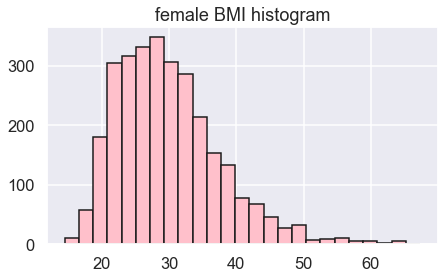

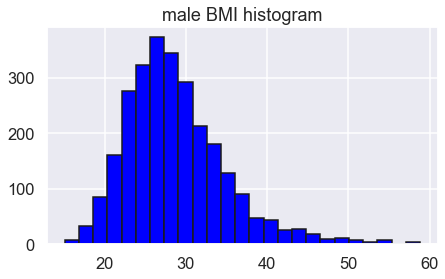

In [120]:
# plot histogram datanya

plt.figure(figsize=(7,4))
plt.title("female BMI histogram")
plt.hist(wanita["BMXBMI"].dropna(), color='pink', bins=25, edgecolor='k')
plt.show


plt.figure(figsize=(7,4))
plt.title("male BMI histogram")
plt.hist(pria["BMXBMI"].dropna(), color='blue', bins=25, edgecolor='k')
plt.show

## Hypothesis testing - one proportion
dataset Heart (untuk sakit jantung)

### 42% population proportion Ireland punya sakit jantung. Apakah ada lebih banyak orang di US yang punya sakit jantung?

1. buat null hypothesis

h1
p > 0.42

h0 
p <= 0.42

2. hitung % orang sakit jantung di US (dari data kaggle pura-pura kita anggap data orang US semua)

p_us = 0.51

3. Hitung angka statistik

test_stat = (be - he) / se = 6.043

4. hitung p-value

p value kecil, < alpha

In [129]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats.distributions as dist

df = pd.read_csv('data/Heart.csv')

sakit = len(df[df['target'] == 1])
total = len(df)
p_us = sakit/total
p_us

0.5131707317073171

In [126]:
se = np.sqrt(0.42 * (1-0.42) / total)
se

0.015416177755376521

In [127]:
be = p_us

he = 0.42
test_stat = (be - he) / se

test_stat

6.04369858636477

In [133]:
pvalue = 2 * dist.norm.cdf(-np.abs(test_stat))
pvalue

1.5062078087269162e-09

- p value nya kecil < alpha
- reject null hypothesis
- kemungkinan besar, lebih banyak orang di US punya penyakit jantung dibanding orang di Ireland